Importing the Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data :

In [2]:
df = pd.read_csv(r"D:\ItVedant\Machine Learning\Projects\Classification\Machine Failure Prediction\data.csv")

To display first five rows of the dataset :

In [3]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


To display no. of columns and rows :

In [4]:
df.shape

(944, 10)

Check the information about dataset :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


Check the null values are present in datset :

In [6]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

Check the duplicated values from the dataset :

In [7]:
df.duplicated().sum()

1

Drop the duplicated values :

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

To display the statical summary :

In [10]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,306.673383,3.726405,4.326617,2.939555,5.393425,2.844115,47.042418,4.564157,16.326617,0.416755
std,1083.144024,2.678334,1.438551,1.384458,1.269869,2.273751,16.431816,1.599452,5.976014,0.493283
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


To plot the boxplot for check the outliers are present in the column

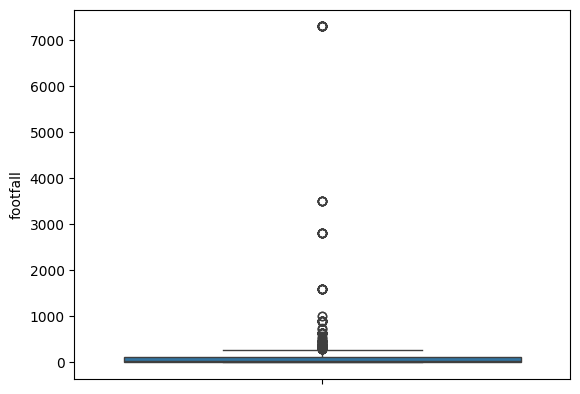

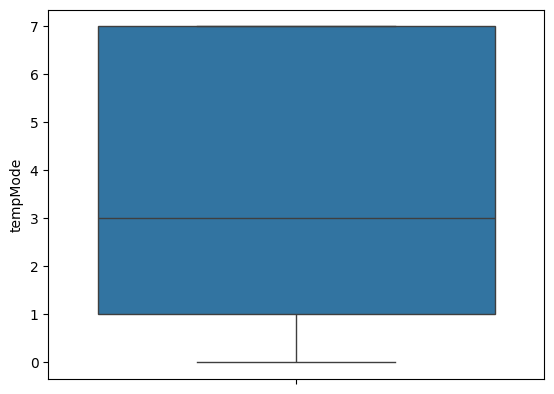

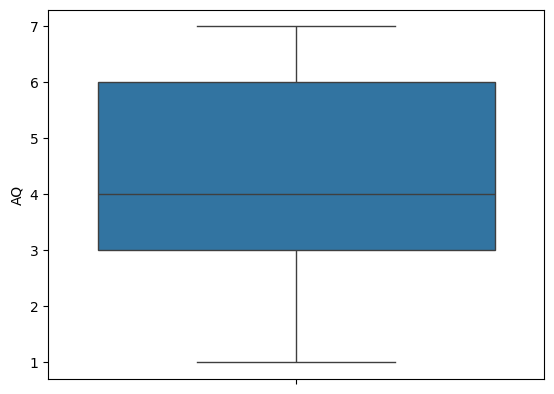

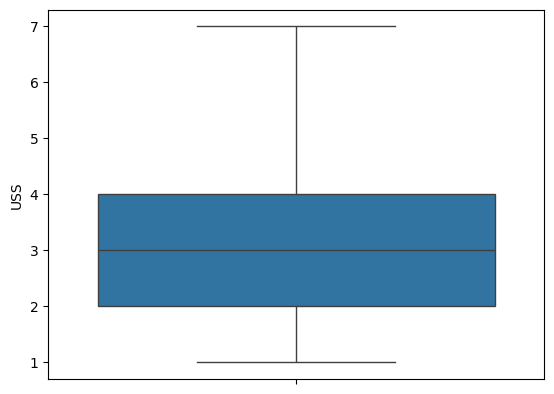

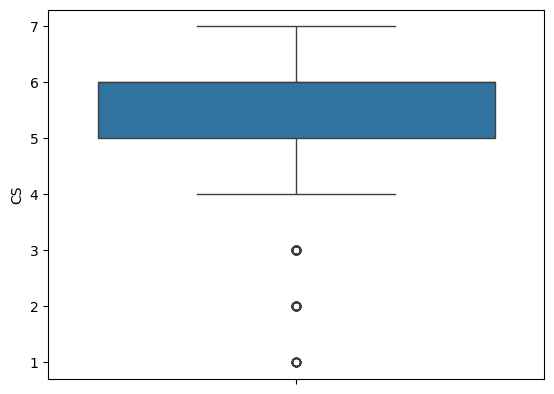

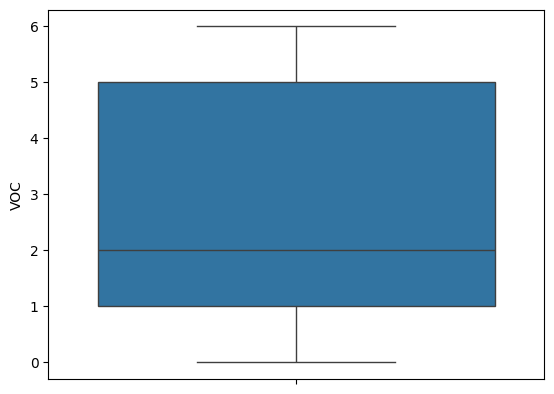

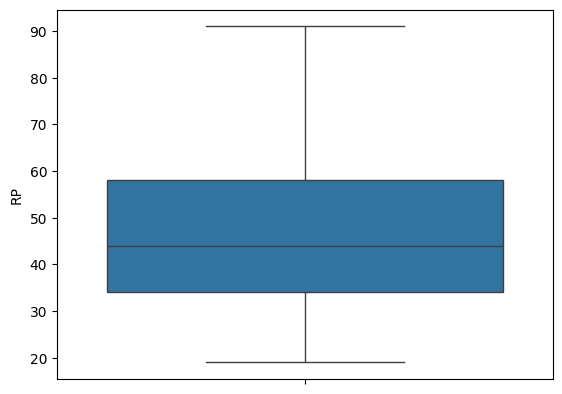

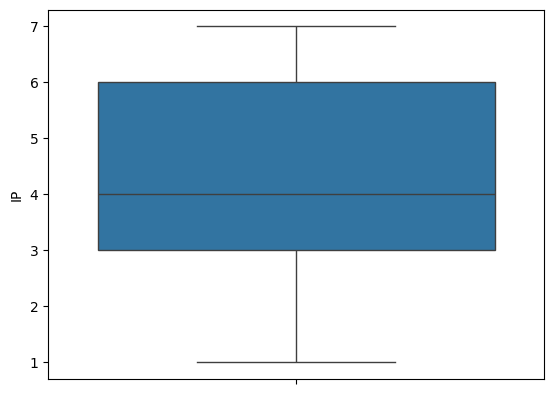

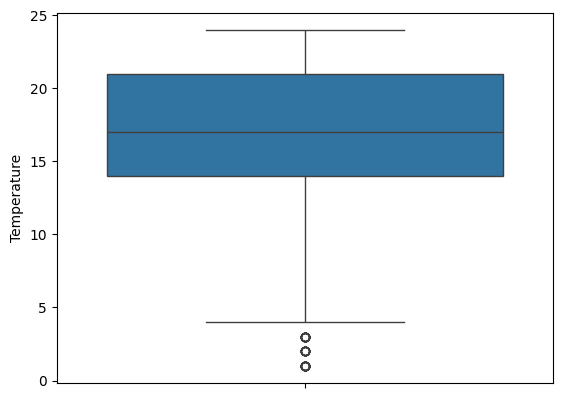

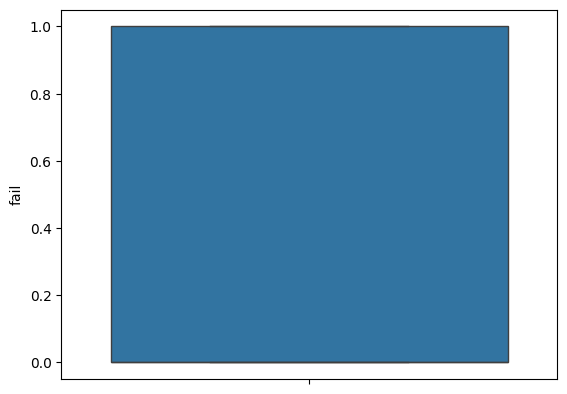

In [11]:
for col in df:
    sns.boxplot(df[col])
    plt.show()

Handling the outliers of each column

In [12]:
Q1 = df['footfall'].quantile(0.25)
Q3 = df['footfall'].quantile(0.75)

IQR = Q3 - Q1

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-162.5 273.5


In [14]:
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

In [15]:
df['footfall'] = df['footfall'].apply(outlier)

In [16]:
Q1 = df['CS'].quantile(0.25)
Q3 = df['CS'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

3.5 7.5


In [18]:
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

In [19]:
df['CS'] = df['CS'].apply(outlier)

In [20]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

3.5 31.5


In [22]:
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

In [23]:
df['Temperature'] = df['Temperature'].apply(outlier)

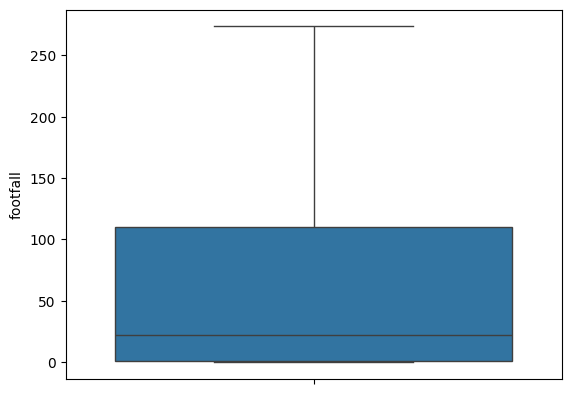

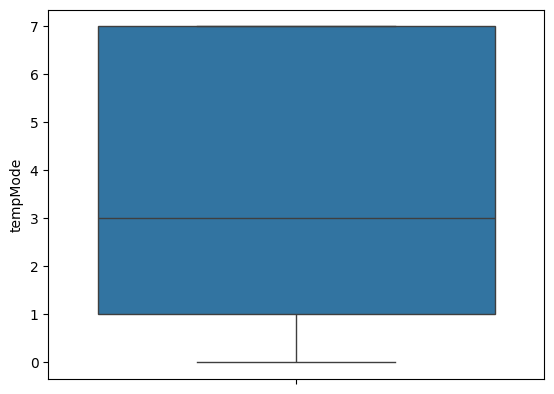

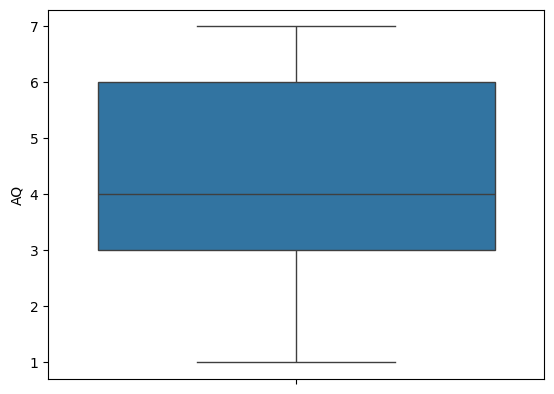

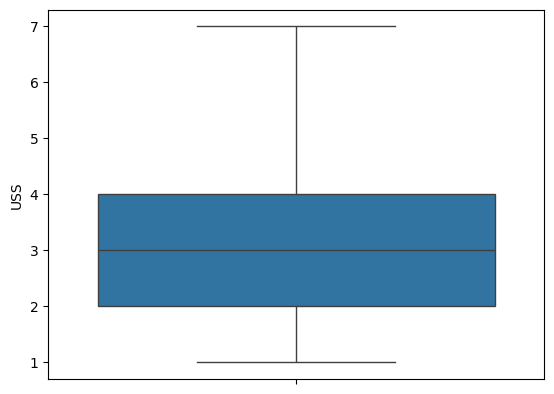

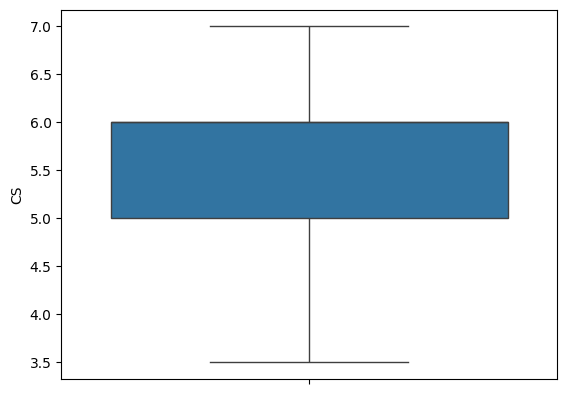

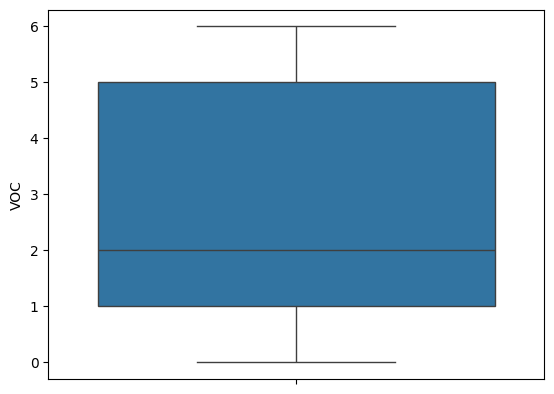

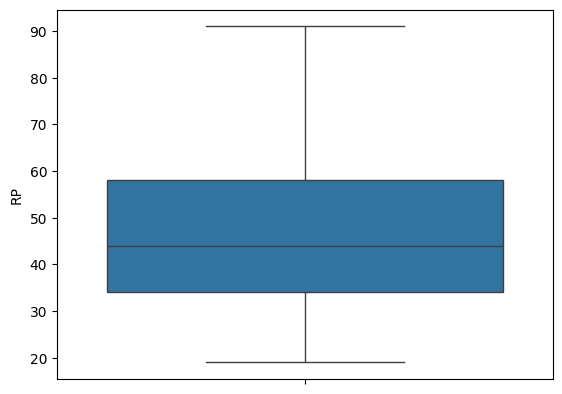

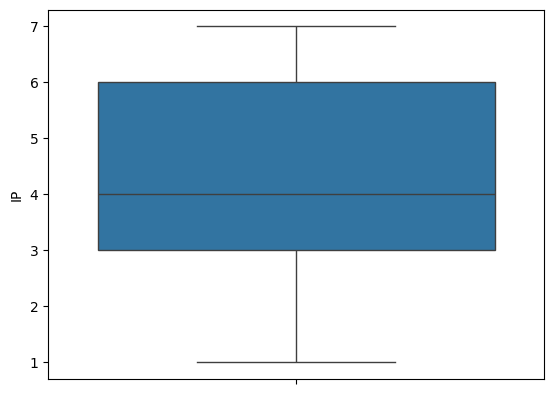

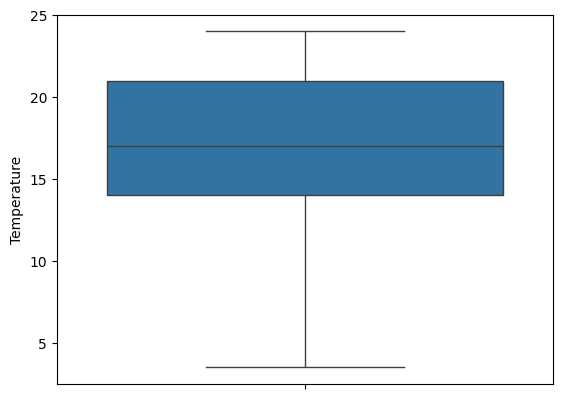

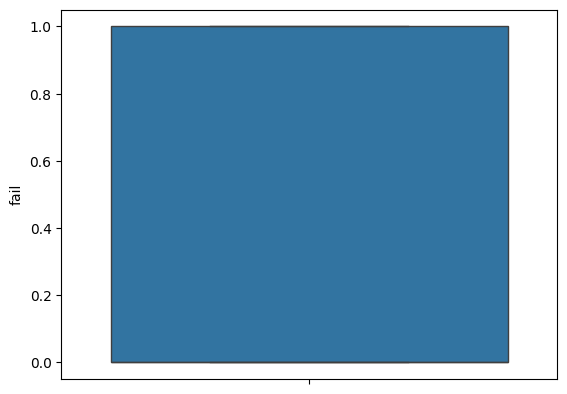

In [24]:
for col in df:
    sns.boxplot(df[col])
    plt.show()

In [25]:
df.shape

(943, 10)

In [26]:
import warnings
warnings.filterwarnings("ignore")

To plot the distplot for numerical column and check the distribution of the graph :

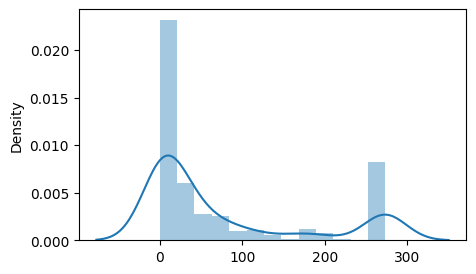

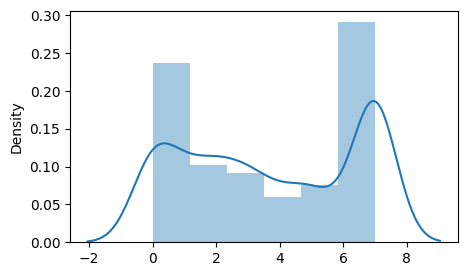

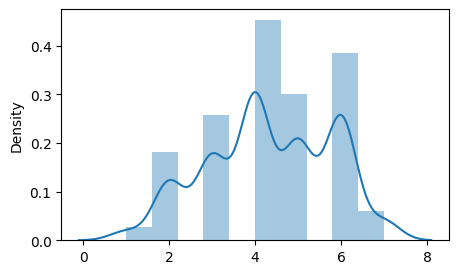

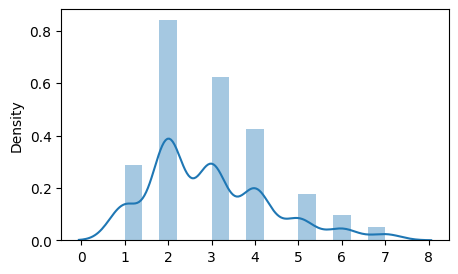

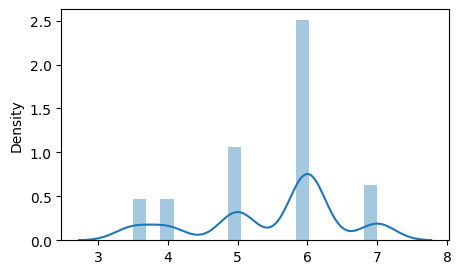

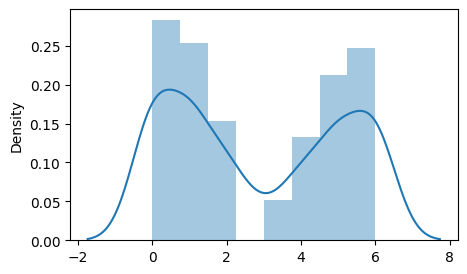

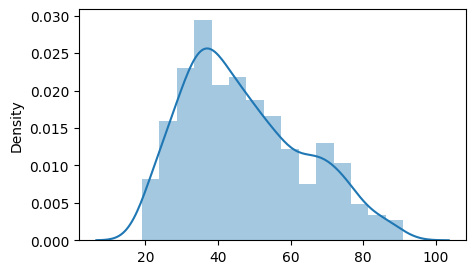

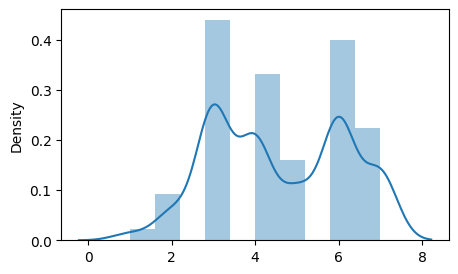

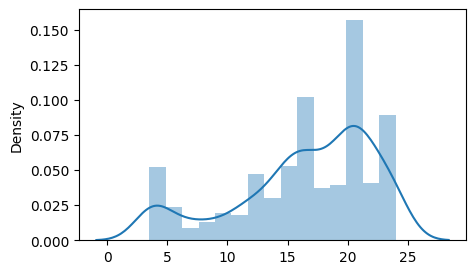

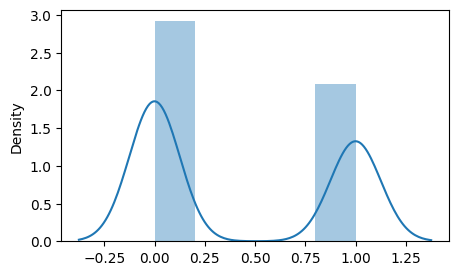

In [27]:
for col in df:
    plt.figure(figsize=(5,3))
    sns.distplot(df[[col]])
    plt.show()

Check the unique value from the column :

In [28]:
df['footfall'].unique()

array([  0. , 190. ,  31. ,  83. , 273.5, 110. , 100. , 180. , 130. ,
         5. ,  33. ,  19. ,  74. ,  12. ,  40. ,   3. ,  64. ,  62. ,
        11. ,   4. ,  35. , 270. ,  45. ,   6. ,   2. ,  67. ,  30. ,
        15. ,  22. ,  32. ,  59. , 170. ,   1. ,  53. ,  16. ,  27. ,
        84. , 200. ,  20. ,  13. ,   9. ,  44. ,  51. ,  29. ,  50. ,
        24. ,  55. ,  63. ,  71. ,  47. ,   8. ,  10. ,  93. ,  56. ,
         7. , 140. ,  14. ,  37. ,  23. ,  87. ,  42. ,  70. ,  54. ,
        75. ,  34. ,  76. , 150. ,  25. ,  18. ,  81. , 160. , 220. ,
        26. ,  88. ,  66. ,  17. ])

Check the skewness of the column

In [29]:
for col in df:
    print(col,":",df[col].skew())

footfall : 1.2001144281849057
tempMode : -0.01773547353250001
AQ : -0.18331464516936394
USS : 0.8108602354118424
CS : -0.5823878421237269
VOC : 0.12308726209216377
RP : 0.5250168966880504
IP : 0.016651499365726945
Temperature : -0.8120664983914481
fail : 0.33823123145144135


Handle the skewness by squareroot method

In [30]:
for col in df:
    if df[col].skew()>0.5:
        df[col]=np.sqrt(df[col])
    print(col,":",df[col].skew())

footfall : 0.636185358276922
tempMode : -0.01773547353250001
AQ : -0.18331464516936394
USS : 0.26302472719758413
CS : -0.5823878421237269
VOC : 0.12308726209216377
RP : 0.22054756391579264
IP : 0.016651499365726945
Temperature : -0.8120664983914481
fail : 0.33823123145144135


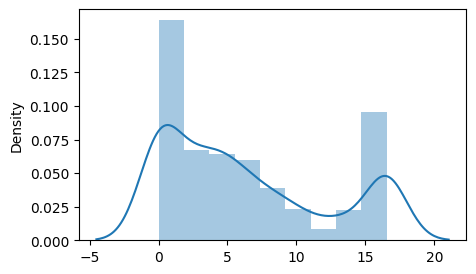

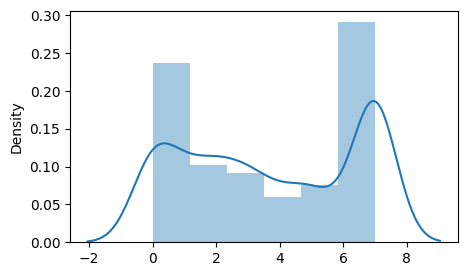

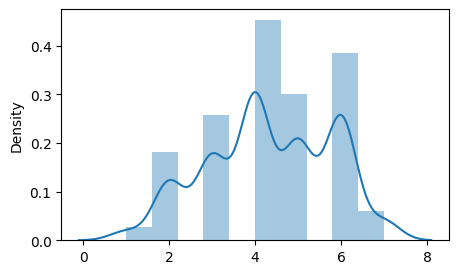

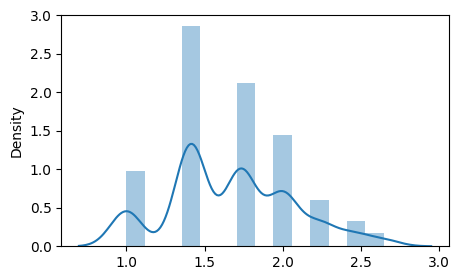

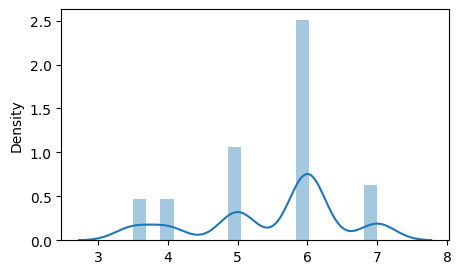

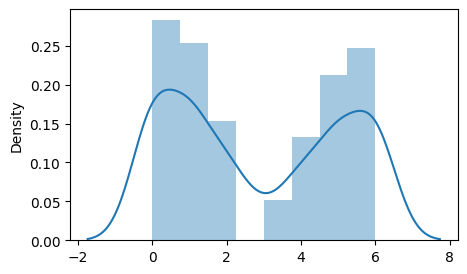

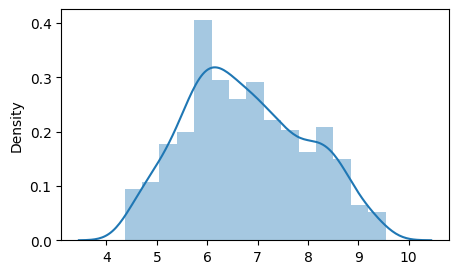

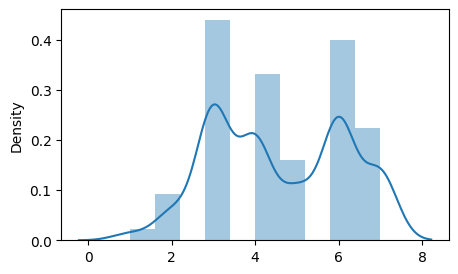

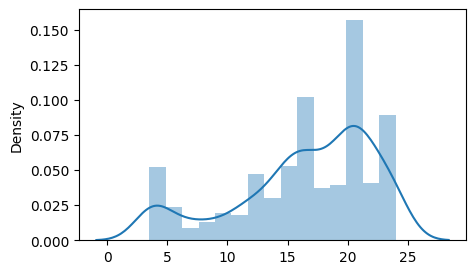

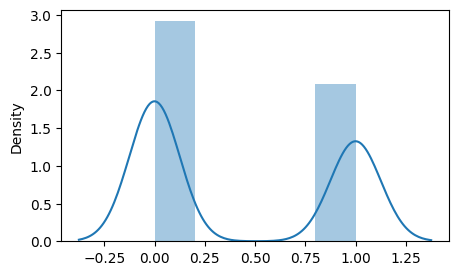

In [31]:
for col in df:
    plt.figure(figsize=(5,3))
    sns.distplot(df[[col]])
    plt.show()

Separate out the input variable and target variable

In [32]:
X = df.drop('fail',axis=1)
Y = df['fail']

Checking the taget variable balance or not

In [33]:
df['fail'].value_counts()

fail
0    550
1    393
Name: count, dtype: int64

Import the randomoversampler for balancing target variable

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
ROS = RandomOverSampler()

In [36]:
x_res, y_res = ROS.fit_resample(X,Y)

To split the data into into traim, test data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)

Import the required classification algorithms 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

Make the object to the all algorithms

In [40]:
LGR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ADBC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
XGC = XGBRFClassifier()
KNN = KNeighborsClassifier()

Training the model on train data

In [41]:
LGR.fit(x_train, y_train)

LogisticRegression()

In [42]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
RF.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
ADBC.fit(x_train, y_train)

AdaBoostClassifier()

In [45]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [46]:
XGC.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [47]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

Predict the values by passing the testing data

In [48]:
y_pred_LGR = LGR.predict(x_test)
y_pred_DT = DT.predict(x_test)
y_pred_RF = RF.predict(x_test)
y_pred_ADBC = ADBC.predict(x_test)
y_pred_GBC = GBC.predict(x_test)
y_pred_XGC = XGC.predict(x_test)
y_pred_KNN = KNN.predict(x_test)


To check the accuracy of the all models

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("Accuracy_Score Logistic Model:", accuracy_score(y_test, y_pred_LGR))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Decision Tree Model :", accuracy_score(y_test, y_pred_DT))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Random Forest Model :", accuracy_score(y_test, y_pred_RF))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Adaboost Model :", accuracy_score(y_test, y_pred_ADBC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score GradientBoost Model :", accuracy_score(y_test, y_pred_GBC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score XGBoost Model :", accuracy_score(y_test, y_pred_XGC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score KNN Model :", accuracy_score(y_test, y_pred_KNN))


Accuracy_Score Logistic Model: 0.9136363636363637

--------------------------------------------------------------
Accuracy_Score Decision Tree Model : 0.8909090909090909

--------------------------------------------------------------
Accuracy_Score Random Forest Model : 0.9272727272727272

--------------------------------------------------------------
Accuracy_Score Adaboost Model : 0.9181818181818182

--------------------------------------------------------------
Accuracy_Score GradientBoost Model : 0.9181818181818182

--------------------------------------------------------------
Accuracy_Score XGBoost Model : 0.9

--------------------------------------------------------------
Accuracy_Score KNN Model : 0.9136363636363637


In [51]:
L = [[0,7,7,1,6,6,36,3,1]]
RF.predict(L)

array([1], dtype=int64)

In [52]:
L = [[1000,7,5,7,4,0,74,1,1]]
RF.predict(L)

array([0], dtype=int64)

Import the pickle and save the best model

In [53]:
import pickle

with open('Machine.pkl', 'wb') as file:
    pickle.dump(RF, file)

In [3]:
List = [1,2,3,45,3,2,]
Set = set(List)
final_list = list(Set)
print(final_list)

[1, 2, 3, 45]


In [ ]:
sns.heatmap(data=df,)